In [1]:
import sys
sys.path.append('C:\\Users\\Hannah\\Desktop\\SLAC\\squat2\\Measurements\\RS_VNA')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from VNA_funcs import *

# Import the data

Currently looking at data from the R&S VNA.  Data format isn't great, but it's good enough for now.

Data is stored in dictionaries in ``npz`` files. 

Dictionary elements are:

| Key | Datatype | Description | 
| --- | -------- | ----------- |
| ``series``   | string | Timestamp of beginning of data acquisition |
| ``amps``     | numpy array | Transmission amplitude in dB |
| ``phases``   | numpy array | Transmission phase, raw/wrapped data from VNA |
| ``freqs`` | numpy array | Frequency points of scan |
| ``vna_power`` | float | power output of VNA |
| ``power_at_device`` | float | user recorded power at device, accounting for warm and cold added attenuation |
| ``bandwidth`` | float | IFBW [Hz] |
| ``averages`` | int | Number of averages  |
| ``nb_points`` | int | Number of points in the scan |

Folder contains 960 scans taken from 20240328_155007 to 20240329_135117


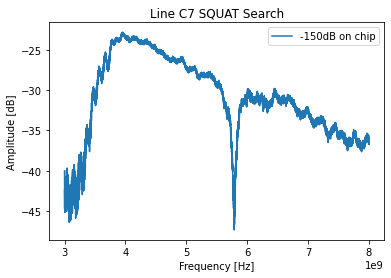

Calculated line delay: -4.118873281138644e-08


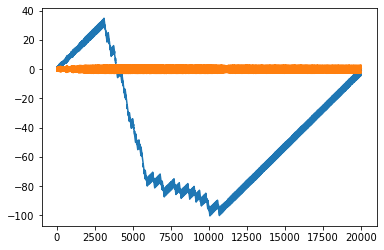

In [14]:
## Filepaths for low power ("lp") and high power ("hp") data
lp_fp = 'C:\\Users\\Hannah\\Desktop\\SLAC\\squat2\\Data\\20240329_Noshin_C7_lower_power'


## Average low power scans into a single dataset
lp = average_folder_of_scans(lp_fp)


## Plot amplitudes of Noshin's data
plt.figure()
plt.plot(lp['freqs'], lp['amps'], label = f"{lp['power_at_device']}dBm on chip")
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.title(f"Line C7 SQUAT Search")
plt.legend()
plt.show()


## Why does phase look so bad??
lp_phases, line_delay = unwrap_phases(lp)
plt.plot(lp_phases)
plt.plot(lp['phases'])